In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
dataset = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Home\Desktop\Rice Leaf Disease",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)

Found 5932 files belonging to 5 classes.


In [4]:
image_size = 256
batch_size = 32
channels=3
epochs=50

In [5]:
class_names = dataset.class_names

In [6]:
len(dataset)

186

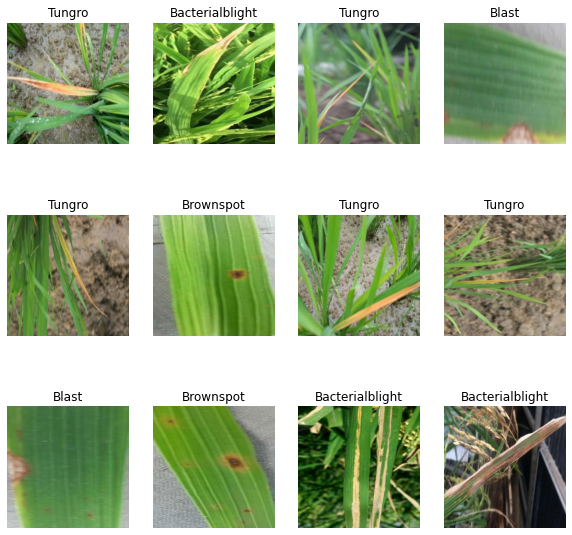

In [7]:
plt.figure(figsize=(10,10))
for i, j in dataset.take(1):
    for k in range(12):
        ax = plt.subplot(3,4,k+1)
        plt.imshow(i[k].numpy().astype('int64'))
        plt.title(class_names[j[k]])
        plt.axis('off')

In [8]:
print(j.numpy().shape)

(32,)


In [9]:
train_ds = dataset.take(int(len(dataset)*0.8))
len(train_ds)

148

In [10]:
def get_ds(ds,train_split=0.8, val_split=0.1,test_split=0.1, shuffle=True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed =12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds,test_ds

In [11]:
train_ds, val_ds, test_ds = get_ds(dataset)

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds =  val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [14]:
data_aug = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [15]:
resize_and_rescale

In [16]:
train_ds = train_ds.map(
    lambda x, y: (data_aug(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [33]:
input_shape = (batch_size, image_size, image_size, channels)
n_classes = 5

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [34]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [36]:
history = model.fit(train_ds,batch_size=batch_size,validation_data=val_ds,verbose=1,epochs=10)

Epoch 1/10
148/148 [==============================] - 459s 3s/step - loss: 0.7989 - accuracy: 0.6947 - val_loss: 0.6770 - val_accuracy: 0.7222
Epoch 2/10
148/148 [==============================] - 274s 2s/step - loss: 0.5531 - accuracy: 0.7877 - val_loss: 0.5515 - val_accuracy: 0.8125
Epoch 3/10
148/148 [==============================] - 302s 2s/step - loss: 0.3873 - accuracy: 0.8543 - val_loss: 0.3192 - val_accuracy: 0.8872
Epoch 4/10
148/148 [==============================] - 313s 2s/step - loss: 0.2903 - accuracy: 0.8899 - val_loss: 0.3917 - val_accuracy: 0.8594
Epoch 5/10
148/148 [==============================] - 297s 2s/step - loss: 0.2400 - accuracy: 0.9107 - val_loss: 0.2357 - val_accuracy: 0.9149
Epoch 6/10
148/148 [==============================] - 300s 2s/step - loss: 0.2433 - accuracy: 0.9078 - val_loss: 0.2010 - val_accuracy: 0.9358
Epoch 7/10
148/148 [==============================] - 300s 2s/step - loss: 0.1704 - accuracy: 0.9402 - val_loss: 0.1176 - val_accuracy: 0.9601

In [37]:
scores = model.evaluate(test_ds)

20/20 [==============================] - 31s 653ms/step - loss: 0.0312 - accuracy: 0.9875


In [38]:
scores

[0.031177405267953873, 0.987500011920929]

In [44]:
import os
model_version=max([int(i) for i in os.listdir("C:/Users/Home/Desktop/rice train models") + [0]])+1
model.save(f"../models/{model_version}")    
model.save("../rice leaf.h5")

INFO:tensorflow:Assets written to: ../models/1\assets
